# Rossman data preparation

In [629]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rossmann-additional/sample_submission.csv
/kaggle/input/rossmann-additional/state_names.csv
/kaggle/input/rossmann-additional/weather.csv
/kaggle/input/rossmann-additional/googletrend.csv
/kaggle/input/rossmann-additional/store_states.csv
/kaggle/input/rossmann-additional/store.csv
/kaggle/input/rossmann-additional/train.csv
/kaggle/input/rossmann-additional/test.csv
/kaggle/input/rossmann-store-sales/sample_submission.csv
/kaggle/input/rossmann-store-sales/store.csv
/kaggle/input/rossmann-store-sales/train.csv
/kaggle/input/rossmann-store-sales/test.csv


### Visualizing the data

In [630]:
from fastai.tabular.all import *
from fastai.learner import *
from fastai.vision.all import *
import tensorflow.keras
import matplotlib as plt
import sklearn
import datetime
import pandas as pd
import numpy as np
from pathlib import Path
import fastai.metrics
import torch

In [631]:
path = '/kaggle/input/rossmann-additional/'
table_names = ['train', 'store', 'store_states', 'state_names', 'googletrend', 'weather', 'test']
train, store, store_states, state_names, googletrend, weather, test = tables  = [pd.read_csv(path + fname+'.csv',
                                                                             low_memory=False) for fname in table_names]

In [632]:
len(train), len(test)

(1017209, 41088)

In [633]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [634]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [635]:
store.head().T

,0,1,2,3,4
Store,1,2,3,4,5
StoreType,c,a,a,c,a
Assortment,a,a,a,c,a
CompetitionDistance,1270.0,570.0,14130.0,620.0,29910.0
CompetitionOpenSinceMonth,9.0,11.0,12.0,9.0,4.0
CompetitionOpenSinceYear,2008.0,2007.0,2006.0,2009.0,2015.0
Promo2,0,1,1,0,0
Promo2SinceWeek,NaN,13.0,14.0,NaN,NaN
Promo2SinceYear,NaN,2010.0,2011.0,NaN,NaN
PromoInterval,NaN,"Jan,Apr,Jul,Oct","Jan,Apr,Jul,Oct",NaN,NaN


In [636]:
store_states.head()

,Store,State
0,1,HE
1,2,TH
2,3,NW
3,4,BE
4,5,SN


In [637]:
state_names.head()

,StateName,State
0,BadenWuerttemberg,BW
1,Bayern,BY
2,Berlin,BE
3,Brandenburg,BB
4,Bremen,HB


In [638]:
weather.head().T

,0,1,2,3,4
file,NordrheinWestfalen,NordrheinWestfalen,NordrheinWestfalen,NordrheinWestfalen,NordrheinWestfalen
Date,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05
Max_TemperatureC,8,7,11,9,8
Mean_TemperatureC,4,4,8,9,8
Min_TemperatureC,2,1,6,8,7
Dew_PointC,7,5,10,9,8
MeanDew_PointC,5,3,8,9,7
Min_DewpointC,1,2,4,8,6
Max_Humidity,94,93,100,100,100
Mean_Humidity,87,85,93,94,94


In [639]:
googletrend.head()

,file,week,trend
0,Rossmann_DE_SN,2012-12-02 - 2012-12-08,96
1,Rossmann_DE_SN,2012-12-09 - 2012-12-15,95
2,Rossmann_DE_SN,2012-12-16 - 2012-12-22,91
3,Rossmann_DE_SN,2012-12-23 - 2012-12-29,48
4,Rossmann_DE_SN,2012-12-30 - 2013-01-05,67


### Feature Engineering

#### Merging tables

In [640]:
def join_df(left, right, left_on, right_on=None, suffix='_y'):
    if right_on is None: right_on = left_on
    return left.merge(right, how='left', left_on=left_on, right_on=right_on, 
                      suffixes=("", suffix))

In [641]:
weather = join_df(weather, state_names, "file", "StateName")
weather[['file', 'Date', 'State', 'StateName']].head()

,file,Date,State,StateName
0,NordrheinWestfalen,2013-01-01,NW,NordrheinWestfalen
1,NordrheinWestfalen,2013-01-02,NW,NordrheinWestfalen
2,NordrheinWestfalen,2013-01-03,NW,NordrheinWestfalen
3,NordrheinWestfalen,2013-01-04,NW,NordrheinWestfalen
4,NordrheinWestfalen,2013-01-05,NW,NordrheinWestfalen


In [642]:
len(weather[weather.State.isnull()])

0

In [643]:
weather.drop(columns=['file', 'StateName'], inplace=True)

In [644]:
store = join_df(store, store_states, 'Store')
store = join_df(store, weather, 'State')

In [645]:
len(store[store.Mean_TemperatureC.isnull()])

0

In [646]:
googletrend.head()

,file,week,trend
0,Rossmann_DE_SN,2012-12-02 - 2012-12-08,96
1,Rossmann_DE_SN,2012-12-09 - 2012-12-15,95
2,Rossmann_DE_SN,2012-12-16 - 2012-12-22,91
3,Rossmann_DE_SN,2012-12-23 - 2012-12-29,48
4,Rossmann_DE_SN,2012-12-30 - 2013-01-05,67


In [647]:
googletrend['Date'] = googletrend.week.str.split(' - ', expand=True)[0]
googletrend['State'] = googletrend.file.str.split('_', expand=True)[2]
googletrend.head()

,file,week,trend,Date,State
0,Rossmann_DE_SN,2012-12-02 - 2012-12-08,96,2012-12-02,SN
1,Rossmann_DE_SN,2012-12-09 - 2012-12-15,95,2012-12-09,SN
2,Rossmann_DE_SN,2012-12-16 - 2012-12-22,91,2012-12-16,SN
3,Rossmann_DE_SN,2012-12-23 - 2012-12-29,48,2012-12-23,SN
4,Rossmann_DE_SN,2012-12-30 - 2013-01-05,67,2012-12-30,SN


In [648]:
store['State'].unique(),googletrend['State'].unique()

(array(['HE', 'TH', 'NW', 'BE', 'SN', 'SH', 'HB,NI', 'BY', 'BW', 'RP',
        'ST', 'HH'], dtype=object),
 array(['SN', None, 'BY', 'TH', 'NW', 'BE', 'RP', 'BW', 'NI', 'SH', 'HE',
        'ST', 'HH', 'SL'], dtype=object))

In [649]:
googletrend.loc[googletrend.State=='NI', "State"] = 'HB,NI'

In [650]:
trend_de = googletrend[googletrend.file == 'Rossmann_DE'][['Date', 'trend']]

In [651]:
googletrend = join_df(googletrend, trend_de, 'Date', suffix='_DE')

In [652]:
googletrend.drop(columns=['file', 'week'], axis=1, inplace=True)
googletrend = googletrend[~googletrend['State'].isnull()]

#### Adding dateparts

In [653]:
googletrend.head()

,trend,Date,State,trend_DE
0,96,2012-12-02,SN,77
1,95,2012-12-09,SN,76
2,91,2012-12-16,SN,85
3,48,2012-12-23,SN,59
4,67,2012-12-30,SN,61


In [654]:
googletrend = add_datepart(googletrend, 'Date', drop=False)

/opt/conda/lib/python3.10/site-packages/fastai/tabular/core.py:25: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[date_field] = pd.to_datetime(df[date_field], infer_datetime_format=True)


In [655]:
googletrend.head().T

,0,1,2,3,4
trend,96,95,91,48,67
Date,2012-12-02 00:00:00,2012-12-09 00:00:00,2012-12-16 00:00:00,2012-12-23 00:00:00,2012-12-30 00:00:00
State,SN,SN,SN,SN,SN
trend_DE,77,76,85,59,61
Year,2012,2012,2012,2012,2012
Month,12,12,12,12,12
Week,48,49,50,51,52
Day,2,9,16,23,30
Dayofweek,6,6,6,6,6
Dayofyear,337,344,351,358,365


In [656]:
googletrend = googletrend[['trend', 'State', 'trend_DE', 'Week', 'Year']]
store = add_datepart(store, 'Date', drop=False)
store = join_df(store, googletrend, ['Week', 'Year', 'State'])

/opt/conda/lib/python3.10/site-packages/fastai/tabular/core.py:25: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[date_field] = pd.to_datetime(df[date_field], infer_datetime_format=True)


In [657]:
make_date(train, 'Date')
make_date(test, 'Date')
train_fe = join_df(train, store, ['Store', 'Date'])
test_fe = join_df(test, store, ['Store', 'Date'])

/opt/conda/lib/python3.10/site-packages/fastai/tabular/core.py:25: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[date_field] = pd.to_datetime(df[date_field], infer_datetime_format=True)
/opt/conda/lib/python3.10/site-packages/fastai/tabular/core.py:25: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[date_field] = pd.to_datetime(df[date_field], infer_datetime_format=True)


#### Elapsed times

In [659]:
all_ftrs = pd.concat([train_fe, test_fe], axis=0)

In [660]:
all_ftrs['StateHoliday'].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [661]:
all_ftrs.StateHoliday = all_ftrs.StateHoliday!='0'

In [662]:
all_ftrs = add_elapsed_times(all_ftrs, ['Promo', 'StateHoliday', 'SchoolHoliday'], 
                             date_field='Date', base_field='Store')

In [663]:
[c for c in all_ftrs.columns if 'StateHoliday' in c]

['StateHoliday',
 'AfterStateHoliday',
 'BeforeStateHoliday',
 'StateHoliday_bw',
 'StateHoliday_fw']

In [664]:
train_df = all_ftrs.iloc[:len(train_fe)]
test_df  = all_ftrs.iloc[len(train_fe):]

In [665]:
train_df = train_df[train_df.Sales != 0.]

In [666]:
train_clean = train_df
test_clean = test_df

## Preparing full data set ##

In [667]:
train_df = train_clean
test_df =test_clean

In [668]:
len(train_df),len(test_df)

(844338, 41088)

In [669]:
procs=[FillMissing, Categorify, Normalize]

In [670]:
dep_var = 'Sales'
cat_names = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'StoreType', 'Assortment', 
    'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear', 'State', 'Week', 'Events', 'Promo_fw', 
    'Promo_bw', 'StateHoliday_fw', 'StateHoliday_bw', 'SchoolHoliday_fw', 'SchoolHoliday_bw']

cont_names = ['CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC', 
    'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h', 
    'CloudCover', 'trend', 'trend_DE', 'AfterStateHoliday', 'BeforeStateHoliday', 'Promo', 'SchoolHoliday']

In [671]:
dep_var = 'Sales'
df = train_df[cat_names + cont_names + [dep_var,'Date']].copy()

In [672]:
test_df['Date'].min(), test_df['Date'].max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [673]:
cut = train_df['Date'][(train_df['Date'] == train_df['Date'][len(test_df)])].index.max()
cut

41254

In [674]:
splits = (list(range(cut, len(train_df))),list(range(cut)))

In [675]:
train_df[dep_var].head()

0     5263.0
1     6064.0
2     8314.0
3    13995.0
4     4822.0
Name: Sales, dtype: float64

In [676]:
train_df[dep_var] = np.log(train_df[dep_var])

In [677]:
test_df = test_df.copy()

In [678]:
splits = (list(range(cut, len(train_df))),list(range(cut)))

In [679]:
paths = Path("/kaggle/working/")

In [680]:
%time to = TabularPandas(train_df, procs, cat_names, cont_names, dep_var, y_block=TransformBlock(), splits=splits)
     

/opt/conda/lib/python3.10/site-packages/fastai/tabular/core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  to[n].fillna(self.na_dict[n], inplace=True)
/opt/conda/lib/python3.10/site-packages/fastai/tabular/core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

CPU times: user 2.14 s, sys: 496 ms, total: 2.63 s
Wall time: 2.65 s


In [681]:
dls = to.dataloaders(bs=512, path=paths)

In [682]:
dls.show_batch()

,Store,DayOfWeek,Year,Month,Day,StateHoliday,StoreType,Assortment,PromoInterval,CompetitionOpenSinceYear,Promo2SinceYear,State,Week,Events,Promo_fw,Promo_bw,StateHoliday_fw,StateHoliday_bw,SchoolHoliday_fw,SchoolHoliday_bw,CompetitionDistance_na,CloudCover_na,CompetitionDistance,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,CloudCover,trend,trend_DE,AfterStateHoliday,BeforeStateHoliday,Promo,SchoolHoliday,Sales
0,438,1,2014,4,7,False,d,c,"Jan,Apr,Jul,Oct",#na#,2012.0,SN,15,#na#,0.0,4.0,0.0,0.0,0.0,0.0,False,False,1110.000176,20.0,1.400000e+01,8.0,89.0,67.0,41.000000,16.0,11.0,5.0,66.000000,69.0,95.999998,-11.000001,1.436881e-08,1.656364e-09,8.297792
1,649,4,2015,2,5,False,a,a,#na#,2002.0,#na#,ST,6,Snow,2.0,5.0,0.0,0.0,5.0,4.0,False,False,14570.000328,2.0,3.018998e-07,-3.0,87.0,74.0,51.000000,14.0,5.0,8.0,69.000000,66.0,30.000000,-57.000000,1.000000e+00,1.000000e+00,8.103191
2,816,4,2013,11,14,False,c,c,#na#,#na#,#na#,NW,46,Fog-Rain,3.0,1.0,0.0,0.0,0.0,0.0,False,False,460.000058,6.0,4.000000e+00,2.0,100.0,93.0,81.000000,21.0,11.0,7.0,68.000000,71.0,13.000000,-41.000000,1.436881e-08,1.656364e-09,8.275122
3,469,2,2013,3,12,False,c,c,#na#,2005.0,#na#,BE,11,Snow,1.0,3.0,0.0,0.0,0.0,0.0,False,False,709.999817,-2.0,-4.000000e+00,-6.0,93.0,76.0,51.000000,19.0,8.0,6.0,72.000000,62.0,69.999999,-16.999999,1.436881e-08,1.656364e-09,9.029657
4,641,6,2014,11,29,False,a,c,"Mar,Jun,Sept,Dec",2003.0,2013.0,NW,48,Fog,5.0,5.0,0.0,0.0,0.0,0.0,False,False,610.000193,6.0,2.000000e+00,-2.0,100.0,85.0,68.000000,21.0,11.0,6.0,88.000001,86.0,28.000000,-26.000000,1.436881e-08,1.656364e-09,8.627123
5,121,3,2014,5,28,False,a,a,"Mar,Jun,Sept,Dec",2009.0,2013.0,SN,22,Rain,2.0,2.0,1.0,0.0,1.0,0.0,False,False,3570.000007,13.0,1.100000e+01,10.0,100.0,96.0,91.000000,24.0,11.0,7.0,63.000000,71.0,27.000000,-0.999998,1.436881e-08,1.656364e-09,8.445482
6,611,5,2013,2,1,False,a,a,"Jan,Apr,Jul,Oct",2002.0,2014.0,BY,5,Rain,4.0,0.0,0.0,0.0,0.0,0.0,False,False,8080.000048,7.0,6.000000e+00,4.0,100.0,91.0,76.000000,32.0,19.0,7.0,51.000000,58.0,26.000000,-56.000000,1.436881e-08,1.656364e-09,8.580919
7,464,1,2013,10,21,False,c,a,#na#,2009.0,#na#,BE,43,Rain,5.0,1.0,0.0,0.0,0.0,0.0,False,False,519.999833,18.0,1.600000e+01,13.0,94.0,76.0,53.000000,27.0,13.0,6.0,67.000000,60.0,18.000000,-64.999999,1.000000e+00,1.656364e-09,9.363062
8,1028,1,2014,8,11,False,a,a,"Jan,Apr,Jul,Oct",#na#,2013.0,NW,33,Rain-Thunderstorm,0.0,4.0,0.0,0.0,5.0,5.0,False,False,150.000060,21.0,1.800000e+01,14.0,82.0,65.0,35.000001,29.0,24.0,3.0,85.000000,81.0,53.000000,-53.000000,1.436881e-08,1.000000e+00,8.155936
9,1036,6,2014,9,13,False,d,c,"Jan,Apr,Jul,Oct",#na#,2013.0,NW,37,Fog,5.0,0.0,0.0,0.0,0.0,0.0,False,False,9559.999839,21.0,1.600000e+01,12.0,94.0,75.0,43.000000,21.0,13.0,4.0,75.999999,70.0,86.000000,-20.000000,1.436881e-08,1.656364e-09,8.170752


## Model ##

In [683]:
max_log_y = np.log(1.2) + np.max(train_df['Sales'])
y_range = (0, max_log_y)

In [684]:
dls.c = 1

In [685]:
learn = tabular_learner(dls, layers=[1000,500], loss_func=MSELossFlat(),
                        config=tabular_config(ps=[0.001,0.01], embed_p=0.04, y_range=y_range), 
                        metrics=exp_rmspe)

In [686]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(1116, 81)
    (1): Embedding(8, 5)
    (2): Embedding(4, 3)
    (3): Embedding(13, 7)
    (4): Embedding(32, 11)
    (5): Embedding(3, 3)
    (6): Embedding(5, 4)
    (7-8): 2 x Embedding(4, 3)
    (9): Embedding(24, 9)
    (10): Embedding(8, 5)
    (11): Embedding(13, 7)
    (12): Embedding(53, 15)
    (13): Embedding(22, 9)
    (14-15): 2 x Embedding(7, 5)
    (16-17): 2 x Embedding(4, 3)
    (18-19): 2 x Embedding(9, 5)
    (20-21): 2 x Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.04, inplace=False)
  (bn_cont): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): Linear(in_features=213, out_features=1000, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): Dropout(p=0.001, inplace=False)
    )
    (1): LinBnDrop(
      (0): Linear(in_features=1000, out

In [687]:
len(dls.train_ds.cont_names)

16

/opt/conda/lib/python3.10/site-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

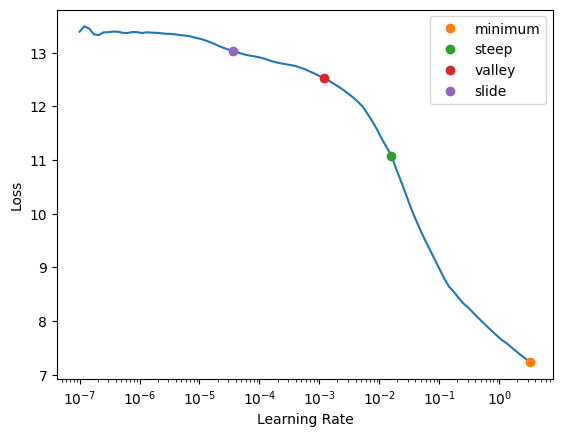

In [688]:
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

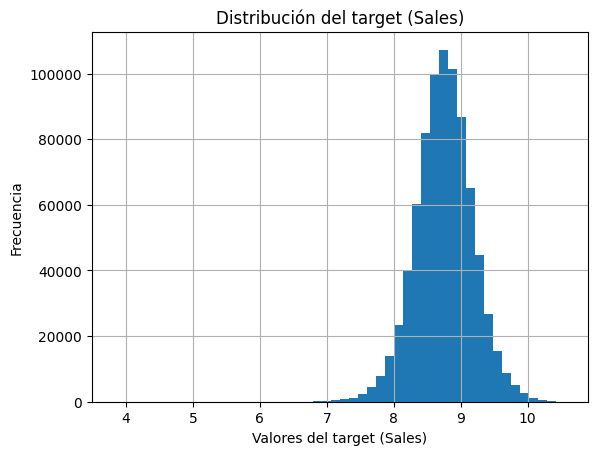

In [690]:
import matplotlib.pyplot as plt

dls.train.y.hist(bins=50)
plt.title("Distribución del target (Sales)")
plt.xlabel("Valores del target (Sales)")
plt.ylabel("Frecuencia")
plt.show()


In [691]:
suggested_lrs = lrs.valley * 3
suggested_lrs
epochs=4

In [692]:
learn.fit_one_cycle(epochs, suggested_lrs, wd=0.2)

epoch,train_loss,valid_loss,_exp_rmspe,time
0,0.069160,0.135880,0.657115,01:17
1,0.017554,0.025827,0.189830,01:19
2,0.011788,0.014706,0.130905,01:22
3,0.009517,0.013173,0.115146,01:25


<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

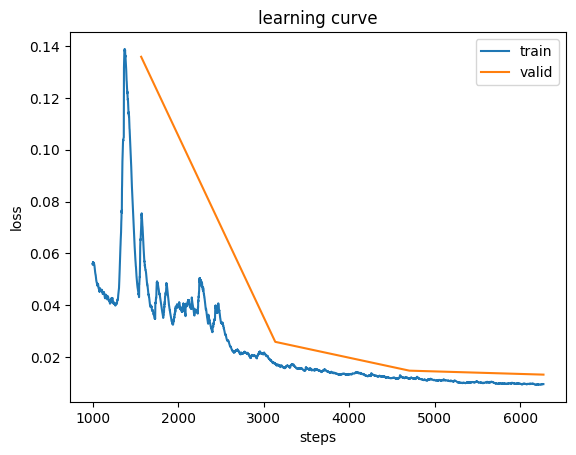

In [693]:

learn.recorder.plot_loss(skip_start=1000)

## Inference on the test set ##

In [699]:
test_to = to.new(test_df)
test_to.process()

/opt/conda/lib/python3.10/site-packages/fastai/tabular/core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  to[n].fillna(self.na_dict[n], inplace=True)
/opt/conda/lib/python3.10/site-packages/fastai/tabular/core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [700]:
test_dls = test_to.dataloaders(bs=512, path=path, shuffle_train=False)

In [701]:
learn.metrics=[]

In [702]:
tst_preds,_ = learn.get_preds(dl=test_dls.train)

In [703]:
np.exp(tst_preds.numpy()).T.shape

(1, 41088)

In [704]:
test_df["Sales"]=np.exp(tst_preds.numpy()).T[0]

In [705]:
test_df[["Id","Sales"]] = test_df[["Id","Sales"]].astype("int")
test_df[["Id","Sales"]].to_csv("submission.csv",index=False)

In [706]:
test_df[["Id","Sales"]]

,Id,Sales
1017209,1,4258
1017210,2,7020
1017211,3,9173
1017212,4,6371
1017213,5,7132
...,...,...
1058292,41084,3037
1058293,41085,7353
1058294,41086,6417
1058295,41087,23086
